<a href="https://colab.research.google.com/github/KLeeDE/PUS2020_KLee/blob/master/HW3/20200920_citibikes_20182019_Kyungmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3
Written by Kyungmin Lee / @KLeeDE / 
for UDel PUS2020

## Contents
1. Come up with a question about the Citibike data usage. It can be anything that involves Categorical data. 
2. Choose the significance threshold
3. Clearly state they Null and Alternate hypothesis (in words and a math formula)
4. Wrangle the data so that it is ready for your analysis.
5. Explore the data statistical properties (mean, standard deviation...)
6. Answer your question with a Z test 
7. Answer your question with a Cohen's h & Chi-squared test of proportions 

In [1]:
# -- import the data
from __future__  import print_function, division
import pylab as plt
import pandas as pd
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Step 1: Come up with a question about the Citibike data usage

* IDEA: People are more likely to ride citibikes on weekends in May, 2019 than May, 2018 (The number of biking trips on weekends has been increased in one year).


# Step 2: Choose the significance threshold
* I will use a significance level  $\alpha=0.05$, which means i want the probability of getting a result at least as significant as mine to be less then 5%

# Step 3: Clearly state they Null and Alternate hypothesis
*   NULL / ALTERNATIVE HYPOTHESIS: The proportion of people who biked on weekends in May 2019 is _the same_ or _higher_  than the proportion of people who biked on weekends in May 2018.

*   P18 : people who biked in May 2018
*   P19 : people who biked in May 2019

## _$H_0$_ : $\frac{P18_{\mathrm{weekend}}}{P18_{\mathrm{total}}} <= \frac{P19_{\mathrm{weekend}}}{P19_{\mathrm{total}}}$
## _$H_1$_ : $\frac{P18_{\mathrm{weekend}}}{P18_{\mathrm{total}}} > \frac{P19_{\mathrm{weekend}}}{P19_{\mathrm{total}}}$

or identically:

## _$H_0$_ : $\frac{P18_{\mathrm{weekend}}}{P18_{\mathrm{total}}} - \frac{P19_{\mathrm{weekend}}}{P19_{\mathrm{total}}} <= 0 $
## _$H_1$_ : $\frac{P18_{\mathrm{weekend}}}{P18_{\mathrm{total}}} - \frac{P19_{\mathrm{weekend}}}{P19_{\mathrm{total}}} > 0$



# Step 4:  Data analysis

In [2]:
# Pull data on May 2018
datestring18 = '201805'
cbMay18 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring18 + "-citibike-tripdata.csv.zip")

# Pull data on May 2019
datestring19 = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring19 + "-citibike-tripdata.csv.zip")

In [3]:
cbMay18.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [4]:
cbMay19.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [5]:
#add a datetime object
cbMay18["date"] = pd.to_datetime(cbMay18.starttime)
cbMay19["date"] = pd.to_datetime(cbMay19.starttime)

In [6]:
#clean up
cbMay18.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

cbMay19.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [7]:
cbMay18.head()

,gender,date
0,1,2018-05-01 05:06:16.584
1,1,2018-05-01 06:25:49.425
2,2,2018-05-01 06:40:26.445
3,1,2018-05-01 07:06:02.973
4,1,2018-05-01 07:26:32.345


In [18]:
cbMay19.head()

,gender,date
0,1,2019-05-01 00:00:01.901
1,0,2019-05-01 00:00:03.021
2,1,2019-05-01 00:00:04.627
3,1,2019-05-01 00:00:19.334
4,1,2019-05-01 00:00:22.184


In [48]:
# May 2018
counts18 = cbMay18['date'].groupby([cbMay18.date.dt.weekday]).count()
# May 2019
counts19 = cbMay19['date'].groupby([cbMay19.date.dt.weekday]).count()

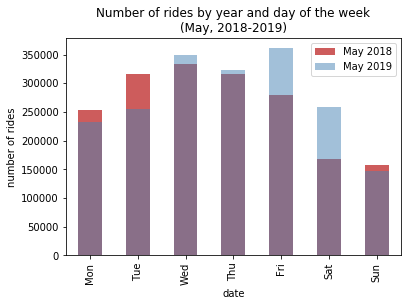

In [47]:
# plot
ax = counts18.plot(kind="bar", 
                                                                        color='IndianRed', 
                                                                        label='May 2018')
ax = counts19.plot(kind="bar", 
                                                                        color='SteelBlue', 
                                                                        alpha=0.5,
                                                                        label='May 2019', ax=ax)

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend();
plt.title("Number of rides by year and day of the week\n(May, 2018-2019)");
plt.ylabel("number of rides");

## Figure 1: Distribution of Citibike bikers by day of the week in May 2018-2019, absolute counts

This graph shows the distribution of citibike bikers by day of the week. The indian red color represents the number of bikers who ride citibikes in May 2018. The steel blue color represents the number of bikers who ride citibikes in May 2018. Each color shows the difference between the number of bikers between May 2018 and May 2019. According to the graph, the number of bikers has been increased on Wednesdaym Thursday, Friday, and Saturday. Otherwise, the number of bikers has been decreased on Monday, Tuesday, and Sunday. 

In [54]:
# May 2018
counts18 = cbMay18['date'].groupby([cbMay18.date.dt.weekday]).count()
norm18 = len(cbMay18)
error18 = cbMay18["date"][cbMay18.date.dt.weekday < 5].groupby(cbMay18.date.dt.date).count().std()
eweekend18 = cbMay18["date"][cbMay18.date.dt.weekday >= 5].groupby(cbMay18.date.dt.date).count().std()
print(norm18, error18, eweekend18)

# May 2019
counts19 = cbMay19['date'].groupby([cbMay19.date.dt.weekday]).count()
norm19 = len(cbMay19)
error19 = cbMay19["date"][cbMay19.date.dt.weekday < 5].groupby(cbMay19.date.dt.date).count().std()
eweekend19 = cbMay19["date"][cbMay19.date.dt.weekday >= 5].groupby(cbMay19.date.dt.date).count().std()
print(norm19, error19, eweekend19)

1824710 11585.741003696874 16706.778726334836
1924563 13874.002308466579 24300.783830685672


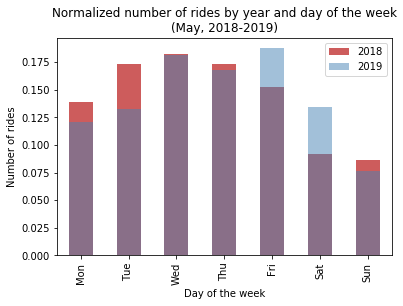

In [55]:
ax=(counts18 / norm18).plot(kind="bar",color='IndianRed', label='2018')
(counts19 / norm19).plot(kind="bar", alpha=0.5, 
                           color='SteelBlue', label='2019', ax=ax)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
plt.legend();
plt.title("Normalized number of rides by year and day of the week\n(May, 2018-2019)");

## Figure 2: Distribution of Citibike bikers by gender in May 2019, normalized

This graph shows the *normalized* distribution of citibike bikers by day of the week. The indian red color represents the fraction of bikers who ride citibikes in May 2018. The steel blue color represents the fraction of bikers who ride citibikes in May 2018. Each color shows the difference between the normalized fraction of bikers between May 2018 and May 2019. According to the graph, the normalized fraction of bikers has been increased on  Friday and Saturday. Otherwise, the fraction of bikers has been decreased on Monday, Tuesday, Wednesday, Thursday, and Sunday. 


* we can add up the weekend days and normalize by the totals, then this becomes a test of proportions, (like the one seen in the [employment notebook](https://github.com/fedhere/UInotebooks/blob/master/hypothesistesting/effectivenes%20of%20NYC%20Post-Prison%20Employment%20Programs.save.ipynb))
* Set up the test of proportions
* I need the fraction of women that bikes during the weekdays and the fraction that bikes during weekends, and the same for men

In [61]:
# May 2018
week18 = sum(counts18[:-2]) * 1.0 / norm18  #fraction of riders in 2018 riding on week days
weekend18 = sum(counts18[-2:]) * 1.0 / norm18  #fraction of riders in 2018 riding on weekends
eweek18 = error18 / norm18  #error on fraction number of riders in 2018 riding on week days
eweekend18 = eweekend18 / norm18 #error on fraction number of riders in 2018 riding on weekends

# May 2019
week19 = sum(counts19[:-2]) * 1.0 / norm19
weekend19 = sum(counts19[-2:]) * 1.0 / norm19
eweek19= error19 / norm19  
eweekend19 = eweekend19 / norm19

print("2018: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week18, weekend18, eweek18, eweekend18))
print("2019: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week19, weekend19, eweek19, eweekend19))

2018: week:0.822, weekend:0.178, weekend error:0.006, weekend error:0.009
2019: week:0.789, weekend:0.211, weekend error:0.007, weekend error:0.013


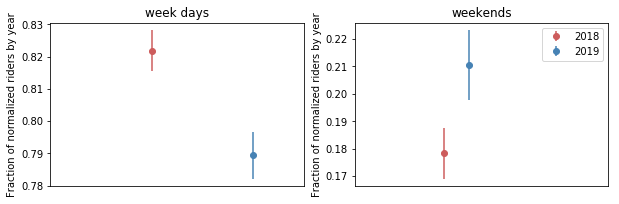

In [83]:
# Plot
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.errorbar([0.2], [week18], yerr=[eweek18], fmt='o', label='2018', color='IndianRed')
ax1.errorbar([0.4], [week19], yerr=[eweek19], fmt='o', label='2019', color='SteelBlue')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.2], [weekend18], yerr=[eweekend18], fmt='o', label='2018', color='IndianRed')
ax2.errorbar([0.4], [weekend19], yerr=[eweekend19], fmt='o', label='2019', color='SteelBlue')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized riders by year")
ax1.set_ylabel("Fraction of normalized riders by year")
ax1.set_xticks([])
ax2.set_xticks([])
plt.xlim(-0.5, 1.5)
plt.legend();

## Figure 3: Fraction of Citibike bikers in May 2018 and 2019 for week days (left) and weekends (right)

This graph shows difference of the fraction of normalized citibike bikers in May 2018 and 2019. The left figure represents for week days and the right figure represents weekends. The indian red color indicates the fraction of normalized bikers who ride citibikes in May 2018. The steel blue color indicates the fraction of normalized bikers who ride citibikes in May 2018. According to the graph, the fraction of normalized bikers had been decreased on weekdays. Otherwise, the fraction of normalized bikers had been increased on weekends. 

* Null Hypothesis: Is the percentage of people riding citibikes on weekends in May 2018 lower or equal to that of people riding citibikes on weekends in May 2019?

* The statistics is: 
 $z = \frac{(p_0 - p_1)}{SE} $
 $p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$
 $SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$
and in this notation 
$p_0 = \frac{P18_{\mathrm{weekend}}}{P18_{\mathrm{total}}}$
 and 
 $p_1 = \frac{P19_{\mathrm{weekend}}}{P19_{\mathrm{total}}}$


In [63]:
P0mP1 = weekend18 - weekend19
print ("difference between the portion in 2018 and 2019: {:.2f}".format(P0mP1))
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between the portion in 2018 and 2019: -0.03
In accordance with Null Hypothesis


According to the test above, the difference between the portion in 2018 and 2019 is in accordance with Null Hypothesis. Therefore, the proportion of people who biked on weekends in May 2019 is _the same_ or _higher_  than the proportion of people who biked on weekends in May 2018.

# Step 5: Data statistical properties (mean, standard deviation...)

In [85]:
# absolute counts
print("In 2018, the number of bikers on weekends: Mean is {0} and Standard deviation is {1}".format(round(counts18.mean(),2), round(counts18.std(),2)))
print("In 2019, the number of bikers on weekends: Mean is {0} and Standard deviation is {1}".format(round(counts19.mean(),2), round(counts19.std(),2)))
print("")
# fraction (week)
print("In 2018, the fraction of standardized bikers on week days: Mean is {0} and Standard deviation is {1}".format(round(week18.mean(),2), round(week18.std(),2)))
print("In 2019, the fraction of standardized bikers on week days: Mean is {0} and Standard deviation is {1}".format(round(week19.mean(),2), round(week19.std(),2)))
print("")
# fraction (weekend)
print("In 2018, the fraction of standardized bikers on weekends: Mean is {0} and Standard deviation is {1}".format(round(weekend18.mean(),2), round(weekend18.std(),2)))
print("In 2019, the fraction of standardized biekrs on weekends: Mean is {0} and Standard deviation is {1}".format(round(weekend19.mean(),2), round(weekend19.std(),2)))

In 2018, the number of bikers on weekends: Mean is 260672.86 and Standard deviation is 72103.57
In 2019, the number of bikers on weekends: Mean is 274937.57 and Standard deviation is 75176.9

In 2018, the fraction of standardized bikers on week days: Mean is 0.82 and Standard deviation is 0.0
In 2019, the fraction of standardized bikers on week days: Mean is 0.79 and Standard deviation is 0.0

In 2018, the fraction of standardized bikers on weekends: Mean is 0.18 and Standard deviation is 0.0
In 2019, the fraction of standardized biekrs on weekends: Mean is 0.21 and Standard deviation is 0.0


# Step 6: Z test 

**Z test**

* defining the functions that calculate the statistics
* the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
* but I am putting it here since you may encounter it in your coding life.
* confront the equation in the markdown cell above with these function to understand as they work

In [76]:
def ztest_p(p0, p1, n0, n1): 
  return (p0 * n0 + p1 * n1) / (n0 + n1)
def ztest_se(p0, p1, n0, n1):
  p = ztest_p(p0, p1, n0, n1)
  return np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
def zscore(p0, p1, n0, n1) : 
  return (p0 - p1) / ztest_se(p0, p1, n0, n1)

# calculations
z = zscore(weekend18, weekend19, norm18, norm19)
print ("The z statistics is %.2f"%z) 

The z statistics is -78.96


#Step 7: Cohen's h 

**Cohen's h**

* Let's check the _effect size_: there are 2 formulae I find in the literature
 $r = \frac{z}{\sqrt{(n_0+n_1)}}$
 and
 $h =  2 (\arcsin \sqrt{p_0} -  \arcsin \sqrt{p_1} )$.
* Link:  https://en.wikipedia.org/wiki/Cohen%27s_h

In [95]:
def r_effectsize (z, n0, n1) :
  return z / np.sqrt(n0 + n1)
def h_effectsize (p0, p1): 
  return 2 * (np.arcsin(np.sqrt(p0)) - np.arcsin(np.sqrt(p1)))

In [96]:
r = r_effectsize(z, norm18, norm19)
print ('r effect size {:.2f}'.format(r))

r effect size -0.04


In [97]:
h = h_effectsize(weekend18, weekend19)
print ("Cohen's h effect size {:.2f}".format(h))

Cohen's h effect size -0.08


# Conclusion
In all these cases we have SMALL EFFECT SIZE